In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    './train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

Found 6 images belonging to 3 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    './test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

Found 3 images belonging to 3 classes.


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') 
])

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [18]:
history=model.fit(
      train_generator,
      steps_per_epoch=1,
      epochs=10,
      validation_data=test_generator,
      validation_steps=1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.1110 - accuracy: 0.3333 - val_loss: 3.0964 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 137ms/step - loss: 2.5627 - accuracy: 0.6667 - val_loss: 1.3994 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 134ms/step - loss: 1.0035 - accuracy: 0.6667 - val_loss: 1.1042 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 132ms/step - loss: 0.5678 - accuracy: 0.8333 - val_loss: 0.9462 - val_accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 132ms/step - loss: 0.5808 - accuracy: 0.6667 - val_loss: 0.8035 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 0s 133ms/step - loss: 0.4144 - accuracy: 0.6667 - val_loss: 0.7382 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 128ms/step - loss: 0.2561 - accuracy: 1.0000 - val_loss: 0.8269 - val_accuracy: 0.6667
Epoch 8/10
1/1 [=======

In [19]:
validation_generator = test_datagen.flow_from_directory(
    './validation',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

Found 3 images belonging to 3 classes.


In [20]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)

1/1 [==============================] - 0s 77ms/step - loss: 0.3092 - accuracy: 1.0000


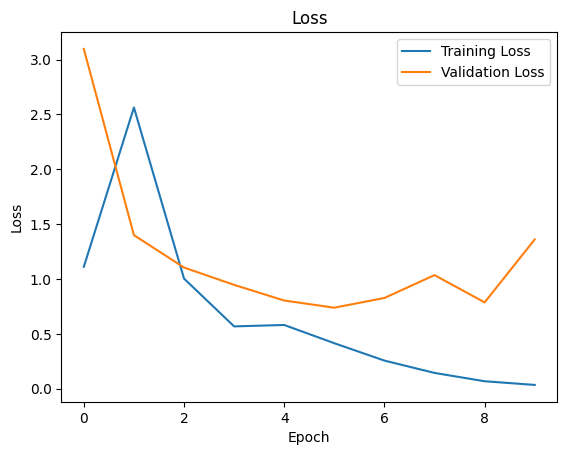

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

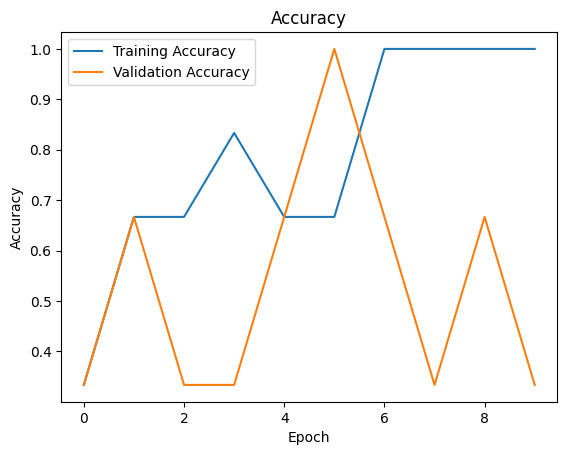

In [22]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

1/1 [==============================] - 0s 65ms/step


In [26]:
true_labels = test_generator.classes

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
cm = confusion_matrix(true_labels, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[0 0 1]
 [0 0 1]
 [0 0 1]]


In [30]:
print("Classification Report:")
print(classification_report(true_labels, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



c:\Users\anshr\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anshr\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anshr\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
